In [214]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stas

In [215]:
df=pd.read_csv("AutoInsurance.csv")
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [216]:
print("The number of rows:",df.shape[0])
print("The number of columns:",df.shape[1])

The number of rows: 9134
The number of columns: 24


In [217]:
df.rename(columns={'Customer Lifetime Value':'CLV'},inplace=True)

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   CLV                            9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [219]:
numerical_cols=df.select_dtypes(include=("int64","float64"))

In [220]:
numerical_cols.columns

Index(['CLV', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Total Claim Amount'],
      dtype='object')

In [221]:
numerical_cols=numerical_cols.drop(["Number of Policies","Number of Open Complaints"],axis=1)
#These columns(Number of Policies and Number of Open Complaints) have numerical/int values but they are actually working like cateogies so we drop them from numerical column for noww but later we will add it in categorical column

WE ARE GOING TO FIND HOW MANY  NUMERICAL AND HOW MANY CATEGORICAL COLUMN WE HAVE WE ARE GOING TO VISULAIZE IT SEPERATELY

In [167]:
numerical_cols.describe()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,2893.239678


In [168]:
df.isnull().sum()

Customer                         0
State                            0
CLV                              0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

# **EDA**

**NUMERICAL FEATURES**

<ipython-input-169-64d95f553d31>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["CLV"])


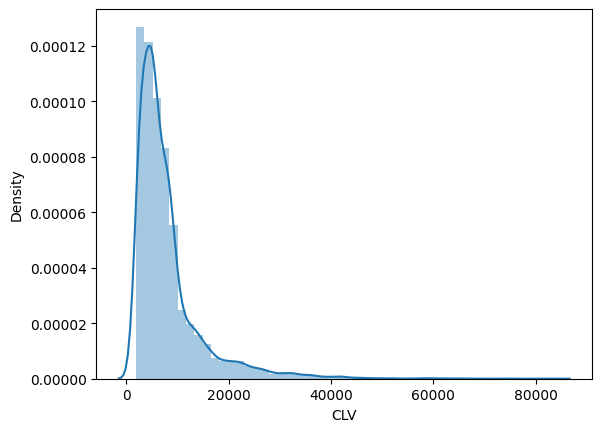

In [169]:
sns.distplot(df["CLV"])
plt.show()

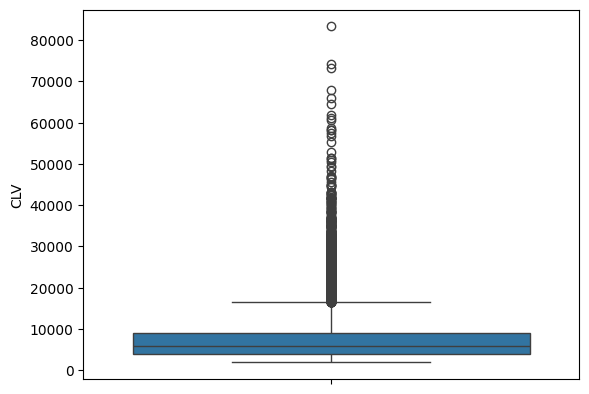

In [170]:
sns.boxplot(df["CLV"])
plt.show()

**UNIVERIATE ANALYSIS**

<ipython-input-171-ffd47b6b5651>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Income"])


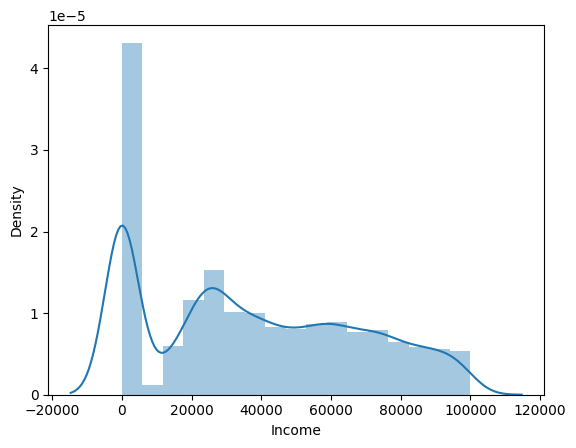

In [171]:
sns.distplot(df["Income"])
plt.show()

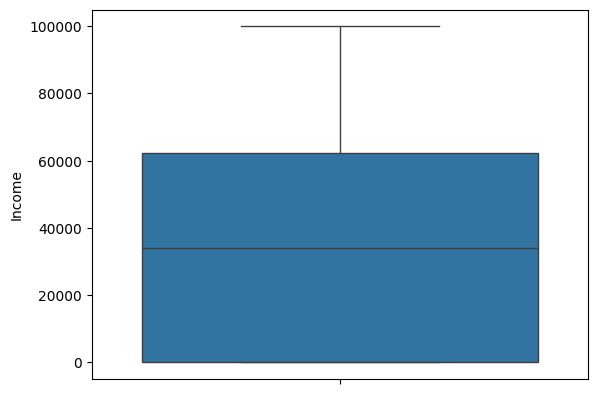

In [172]:
sns.boxplot(df["Income"])
plt.show()

**BIVARIATE ANALYSIS**

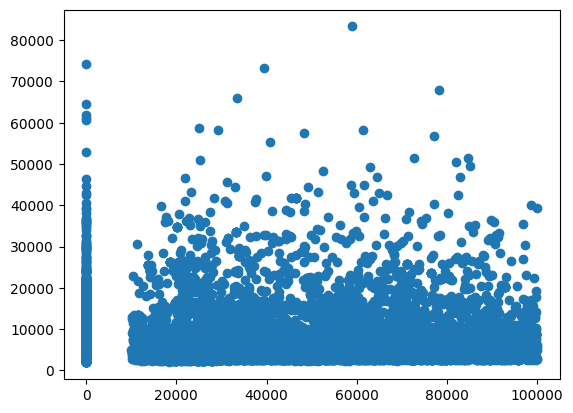

In [173]:
plt.scatter(df["Income"],df["CLV"])
plt.show()

# MONTHLY PREMIUM AUTO

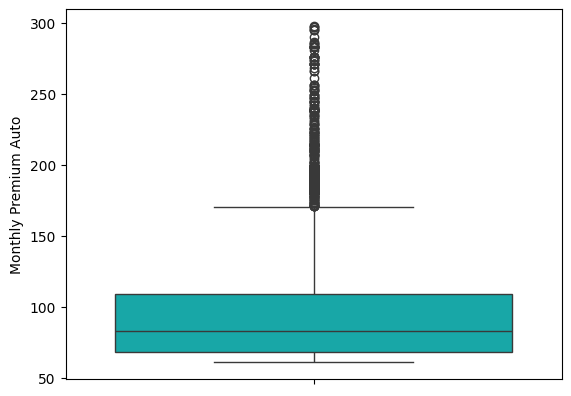

In [174]:
sns.boxplot(df["Monthly Premium Auto"],color="c")
plt.show()

# **BIVARIATE ANALYSIS**

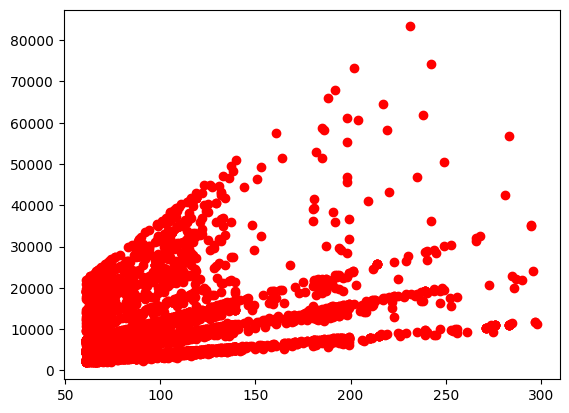

In [175]:
plt.scatter(df["Monthly Premium Auto"],df["CLV"],color="r")
plt.show()

There is a relationship between income and clv

# ***Months since Last Claim***

<ipython-input-176-a5d715d00e85>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Months Since Last Claim"])


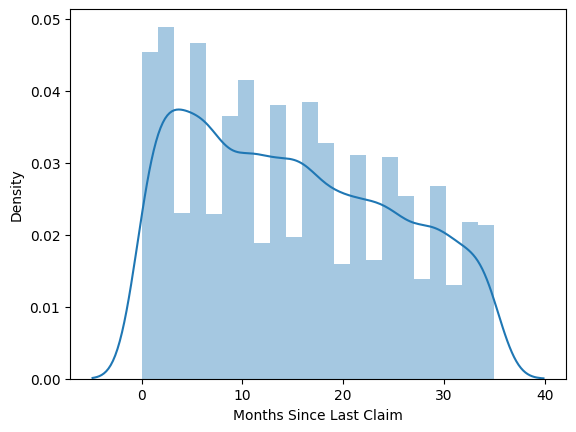

In [176]:
sns.distplot(df["Months Since Last Claim"])
plt.show()

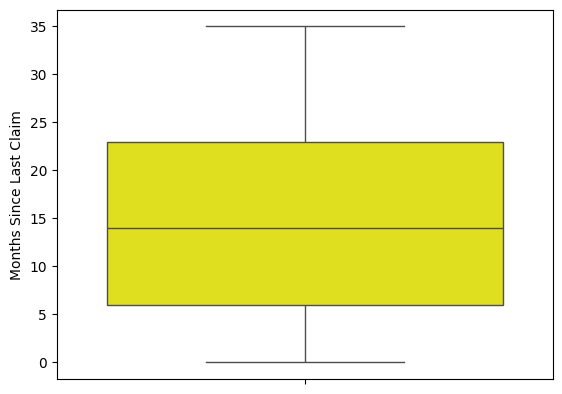

In [177]:
sns.boxplot(df["Months Since Last Claim"],color="Yellow")
plt.show()

# **BIVARIATE ANALYSIS**

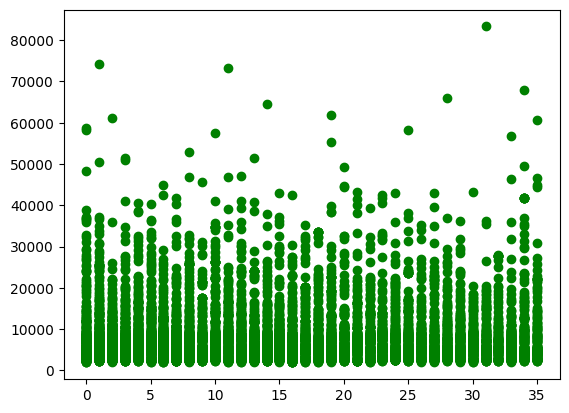

In [178]:
plt.scatter(df["Months Since Last Claim"],df["CLV"],color="g")
plt.show()

There is  no linear relationship

# **MONTHS SINCE POLICY INCEPTION**

<ipython-input-179-16ddb0b3c524>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Months Since Policy Inception"])


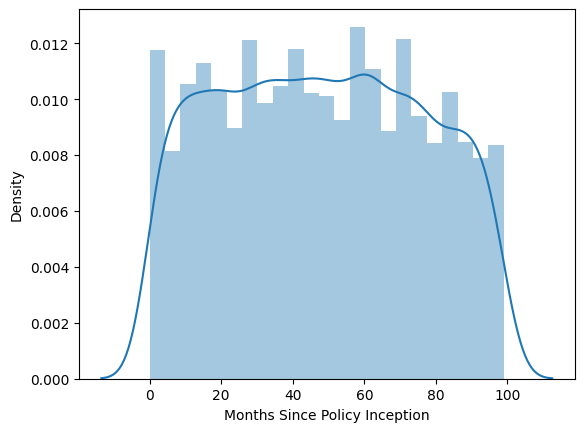

In [179]:
sns.distplot(df["Months Since Policy Inception"])
plt.show()

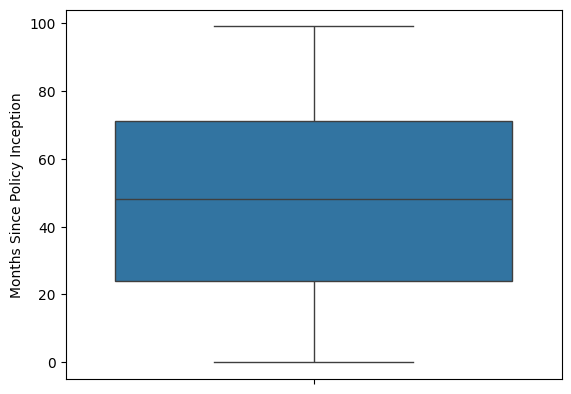

In [180]:
sns.boxplot(df["Months Since Policy Inception"])
plt.show()

# **Total Claim Amount**

<ipython-input-181-f98ae4cf0e5a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Total Claim Amount"])


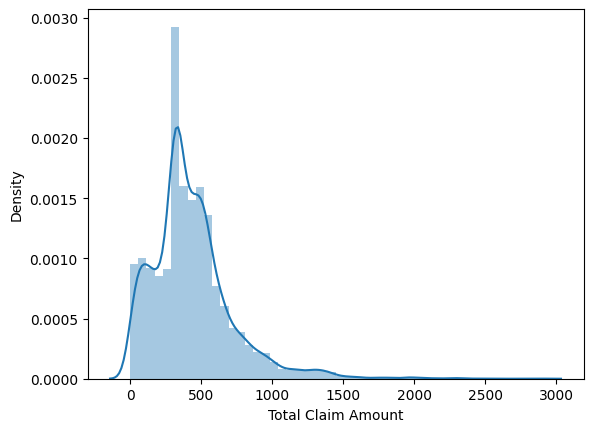

In [181]:
sns.distplot(df["Total Claim Amount"])
plt.show()

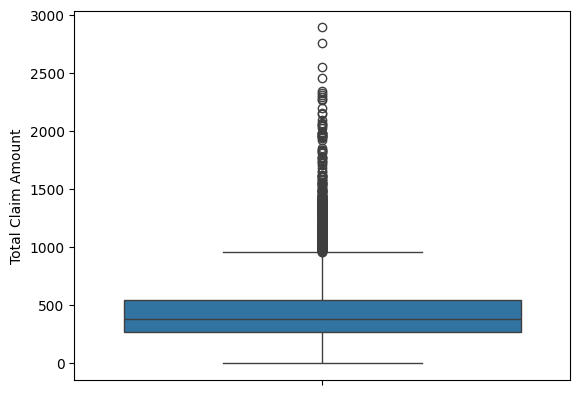

In [182]:
sns.boxplot(df["Total Claim Amount"])
plt.show()

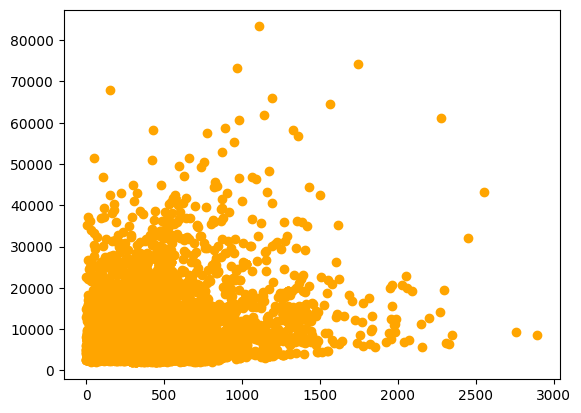

In [183]:
plt.scatter(df["Total Claim Amount"],df["CLV"],color="orange")
plt.show()

There is a linear relationship between CLV and Total Claim Amount

The monthly premium auto and income feature has multiple peaks we can apply any of the transformation(SQUARE/CUBE)

<ipython-input-184-9c9bd408c9c2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.square(df["Monthly Premium Auto"]),color ="r")


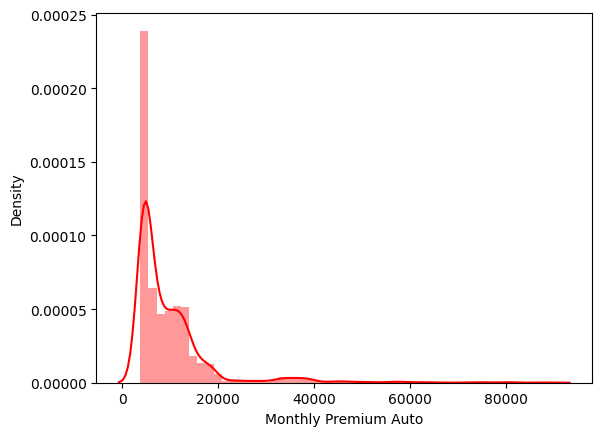

In [184]:
sns.distplot(np.square(df["Monthly Premium Auto"]),color ="r")
plt.show()

# **CATEGORICAL VARIABLES**

In [185]:
cat_cols=df.select_dtypes(include="object")

In [186]:
no_col=df[["Number of Open Complaints","Number of Policies"]] #Dropped column added in categorical column

In [187]:
cat_cols=pd.concat([cat_cols,no_col],axis=1)

In [188]:
cat_cols.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,HB64268,Washington,No,Basic,Bachelor,3/2/2011,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1


In [189]:
cat_cols.drop('Effective To Date',axis=1,inplace=True)

In [ ]:
cat_cols.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints',
       'Number of Policies'],
      dtype='object')

In [ ]:
for i in cat_cols:
  print("Unique values in",str(i),"is",df[i].nunique())
  print(df[i].value_counts())
  print("---------------------------------------------")

Unique values in Customer is 9134
BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: Customer, Length: 9134, dtype: int64
---------------------------------------------
Unique values in State is 5
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64
---------------------------------------------
Unique values in Response is 2
No     7826
Yes    1308
Name: Response, dtype: int64
---------------------------------------------
Unique values in Coverage is 3
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
---------------------------------------------
Unique values in Education is 5
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64
---------------------------------------------

# **State**

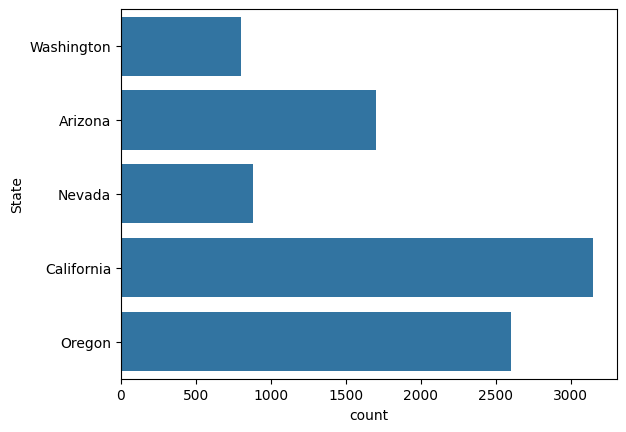

In [ ]:
sns.countplot(df["State"])
plt.show()

Most number of people are residing in california

# **Response**

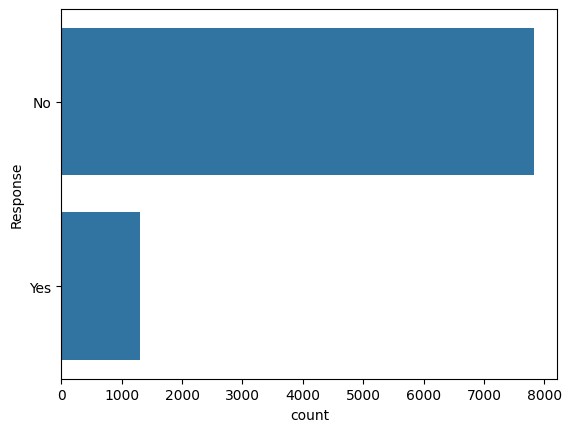

In [ ]:
sns.countplot(df["Response"])
plt.show()

Most number of people's Response is NO

# **Education**

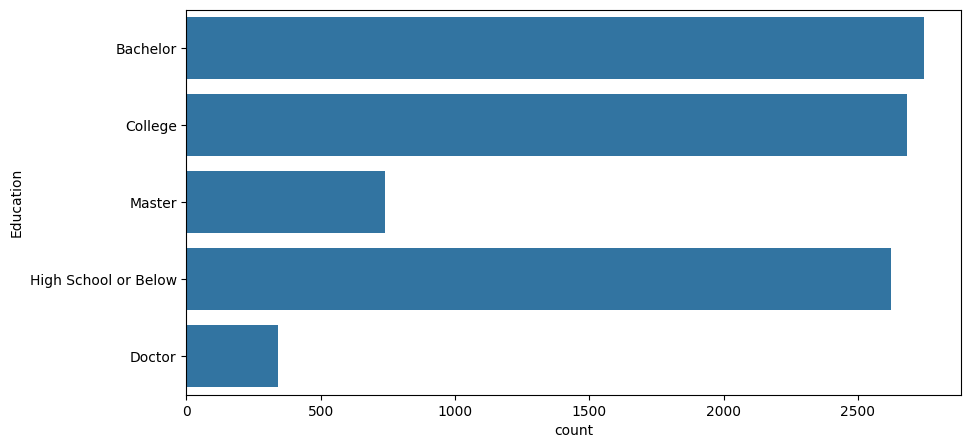

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(df["Education"])
plt.show()

Most number of people's have completed either Bachelor's or College Degree

# **Employment Status**

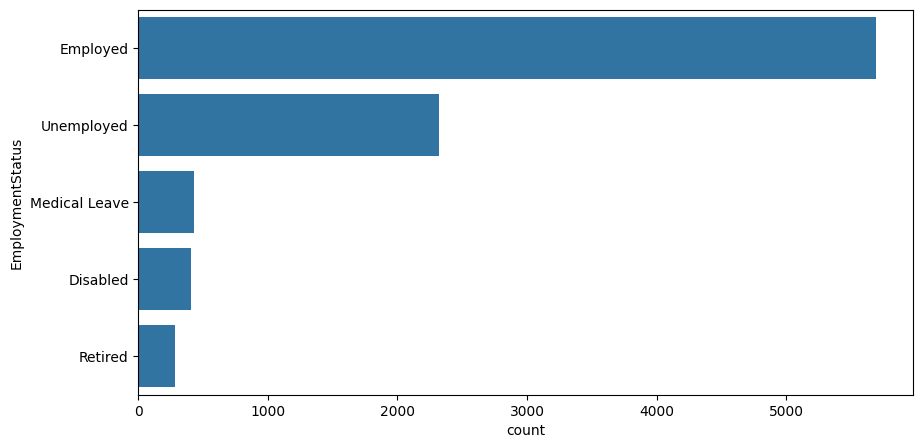

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(df["EmploymentStatus"])
plt.show()

Most of the people are either employed or unemployed. Some are on MEdical Leave,some are Disabled and some are retired

In [ ]:
df["EmploymentStatus"].value_counts(normalize=True)*100

Employed         62.382308
Unemployed       25.366762
Medical Leave     4.729582
Disabled          4.433983
Retired           3.087366
Name: EmploymentStatus, dtype: float64

Around 62.38% of the customers are employed

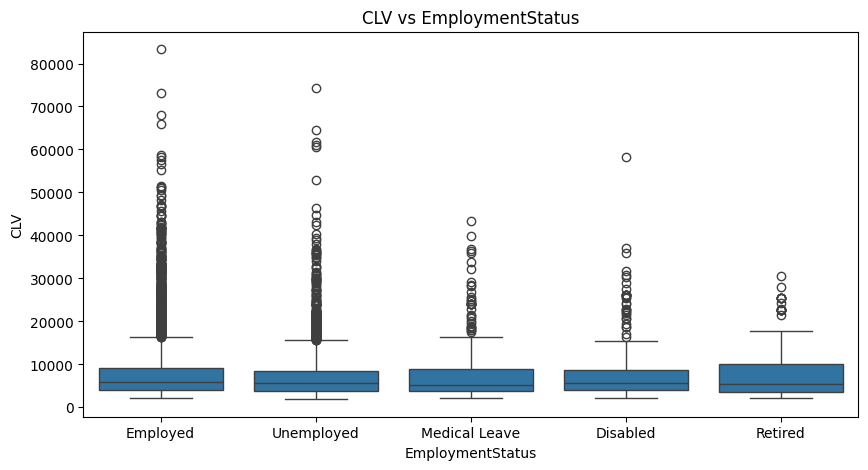

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['EmploymentStatus'],y=df['CLV'])
plt.title("CLV vs EmploymentStatus")
plt.show()

# **Gender**

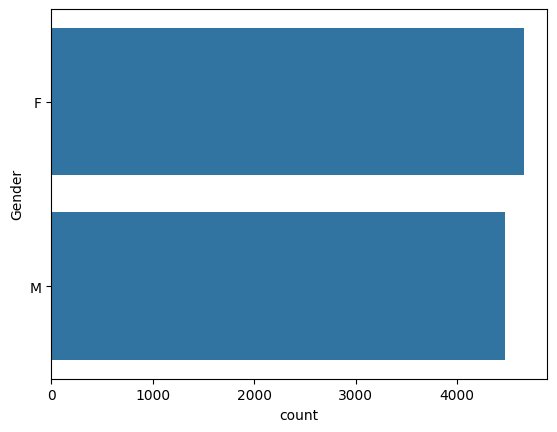

In [ ]:
sns.countplot(df["Gender"])
plt.show()

Most Number of People are Female.




# **Location code**

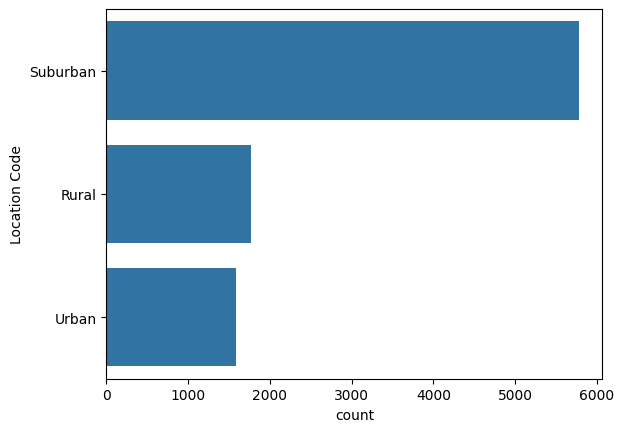

In [ ]:
sns.countplot(df["Location Code"])
plt.savefig("location.png")
plt.show()

# **Marital Status**

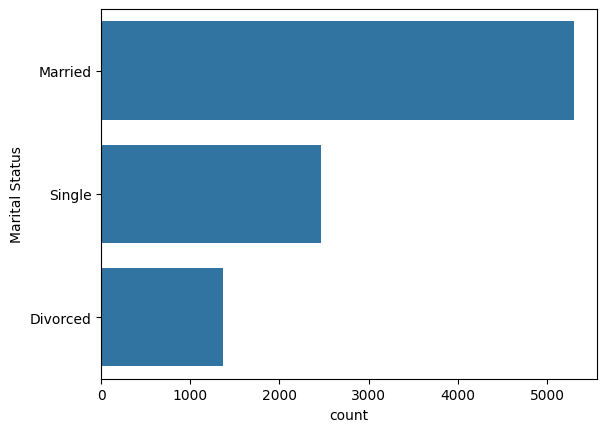

In [ ]:
sns.countplot(df["Marital Status"])
plt.show()

Most no. of people are married.

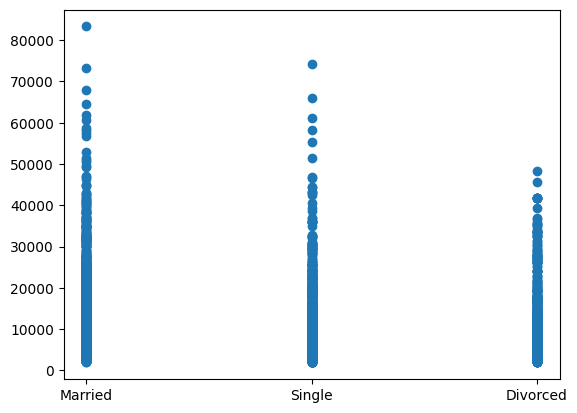

In [ ]:
plt.scatter(df["Marital Status"],df['CLV'])
plt.show()

# **Policy Type**

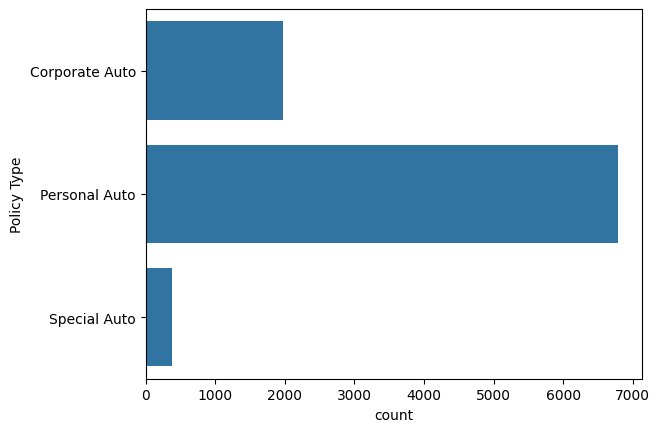

In [ ]:
sns.countplot(df["Policy Type"])
plt.show()

# **Policy**

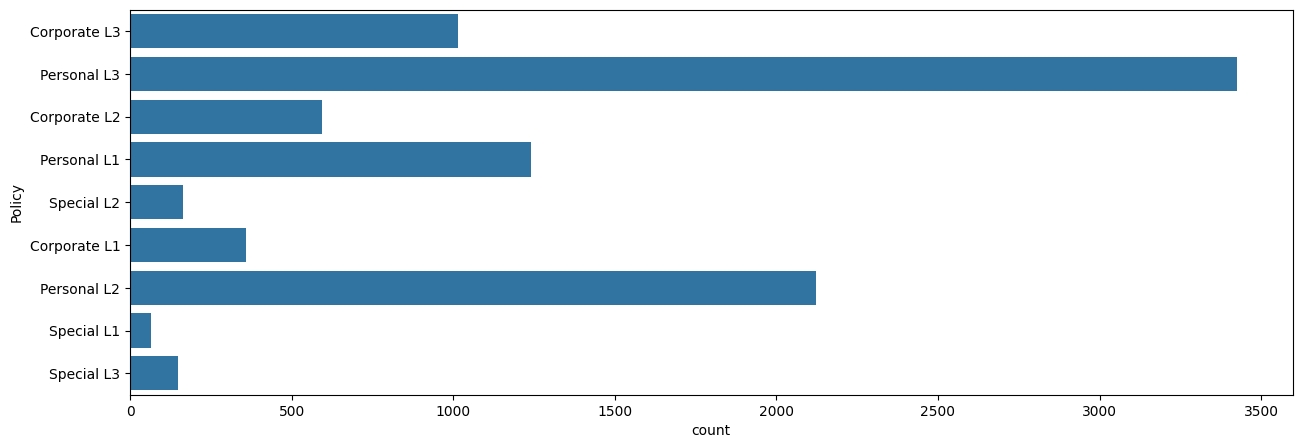

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(df["Policy"])
plt.show()

Personal L3 policy subcategory has the most number of customers.

# **Renew Offer Type**

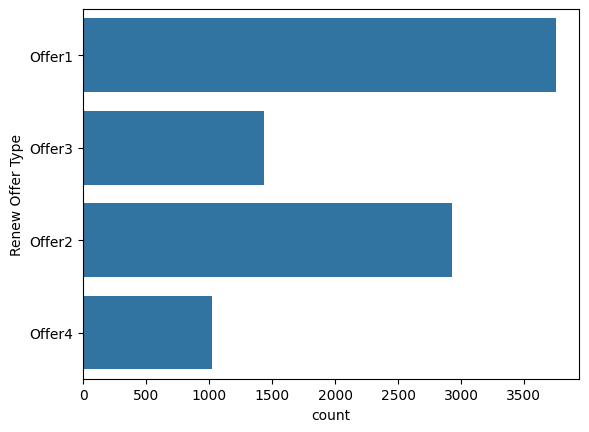

In [ ]:
sns.countplot(df["Renew Offer Type"])
plt.show()

Most preferred offer by people is offer1.

# **Sales Channel**

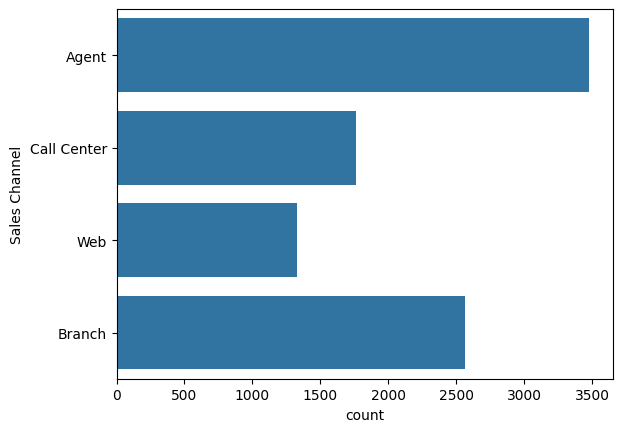

In [ ]:
sns.countplot(df["Sales Channel"])
plt.show()

Mostl preferred sales Channel is Agent.

# **Vehicle Class**

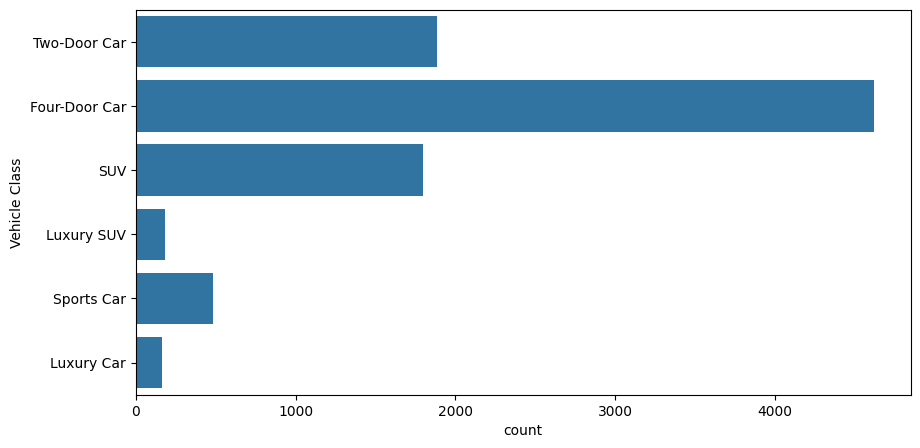

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(df["Vehicle Class"])
plt.show()

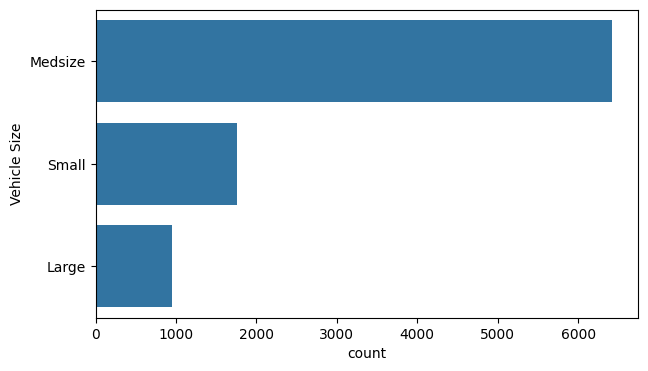

In [ ]:
plt.figure(figsize=(7,4))
sns.countplot(df["Vehicle Size"])
plt.show()

In [191]:
df['Effective To Date']=pd.to_datetime(df['Effective To Date'],infer_datetime_format=True) #convert date into date time format

In [192]:
df["Months"]=df["Effective To Date"].dt.month

In [193]:
df["Months"]=df["Months"].astype('object')

# **Months**

In [194]:
df.head(2)

,Customer,State,CLV,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Months
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1


Text(0.5, 1.0, 'Bar Graph of Months')

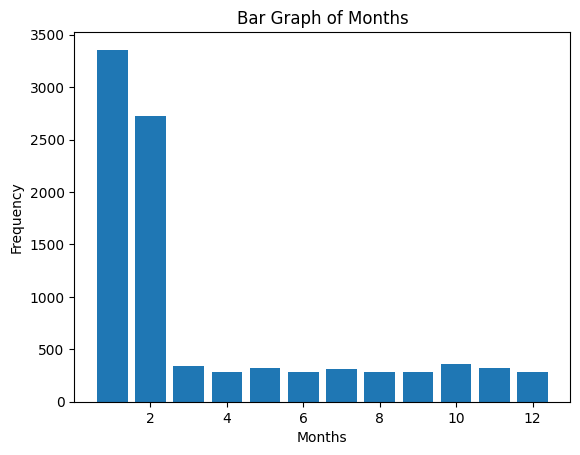

In [195]:
# We will analysing data according to months
# Count the occcurance of each Month
month_counts=df['Months'].value_counts()

# Sort the months by their index(month names)
math_counts=month_counts.sort_index()

#Create the bar graph
plt.bar(month_counts.index,month_counts.values)

# Adding labels and title
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.title('Bar Graph of Months')

In [196]:
cat_cols.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints',
       'Number of Policies'],
      dtype='object')

In [197]:
df.columns

Index(['Customer', 'State', 'CLV', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Income',
       'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Months'],
      dtype='object')

# **Heat Map**

In [198]:
heatmap=df[['CLV','Income','Monthly Premium Auto','Total Claim Amount']]

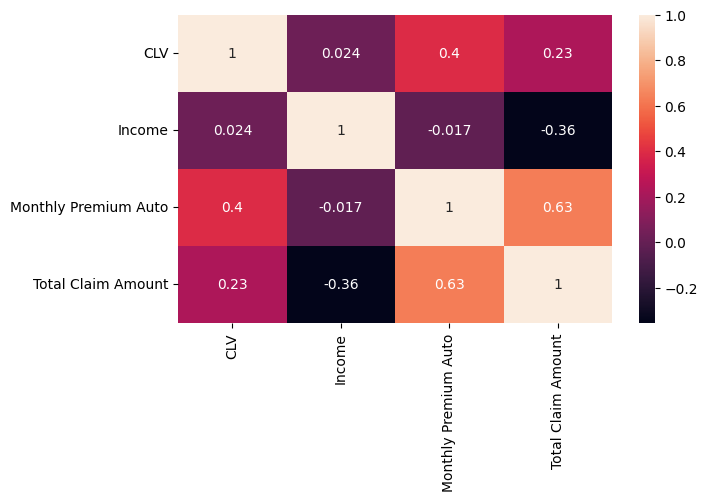

In [199]:
plt.figure(figsize=(7,4))
sns.heatmap(heatmap.corr(),annot=True)
plt.show()

# **Statistical Significance**

In [200]:
stas.shapiro(df['CLV'])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.7033725380897522, pvalue=0.0)

p-value less than 0.05 we reject null hypothesis the data is not normally distributed

We will proceed with non parametric tests since the dependent variable is not normally distributed

In [201]:
columns_cat=list(cat_cols.columns)
columns_cat

['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size',
 'Number of Open Complaints',
 'Number of Policies']

In [202]:
manwithwhiteneyy=[]
anova=[]
for i in columns_cat:
  if (df[i].nunique()>2):
    anova.append(i)
  else:
    manwithwhiteneyy.append(i)
print("Anova:",anova)
print('TTest:',manwithwhiteneyy)

Anova: ['Customer', 'State', 'Coverage', 'Education', 'EmploymentStatus', 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints', 'Number of Policies']
TTest: ['Response', 'Gender']


# **Data Preprocessing**

In [222]:
cat_cols.head()

,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1


In [223]:
catg=pd.get_dummies(cat_cols,drop_first=True)  #we converted all catagorical(object data type) into dummies or numbers
catg

,Number of Open Complaints,Number of Policies,Customer_AA11235,Customer_AA16582,Customer_AA30683,Customer_AA34092,Customer_AA35519,Customer_AA56476,Customer_AA69265,Customer_AA71604,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,7,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,2,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9130,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9131,3,2,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9132,0,3,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [224]:
dfn=pd.concat([numerical_cols,catg],axis=1)
dfn.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount,Number of Open Complaints,Number of Policies,Customer_AA11235,Customer_AA16582,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,56274,69,32,5,384.811147,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1,6979.535903,0,94,13,42,1131.464935,0,8,0,0,...,0,0,0,0,0,0,0,0,1,0
2,12887.431650,48767,108,18,38,566.472247,0,2,0,0,...,0,0,0,0,0,0,0,1,1,0
3,7645.861827,0,106,18,65,529.881344,0,7,0,0,...,0,1,0,0,0,1,0,0,1,0
4,2813.692575,43836,73,12,44,138.130879,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [208]:
dfn.rename(columns={'CLV':'CLV'},inplace=True)

# **MODEL TRAINING**

In [225]:
# Split the data
x=dfn.drop(['CLV'],axis=1)
y=dfn['CLV']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [226]:
numerical_cols.rename(columns={'CLV':'CLV'},inplace=True)

In [227]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6393, 9183)
(6393,)
(2741, 9183)
(2741,)


# **MODEL BUILDING**

**LINEAR REGRESSION**

In [228]:
from sklearn.linear_model import LinearRegression

In [213]:
lr=LinearRegression()
model=lr.fit(x_train,y_train)
print(f'R^2 score for train: {lr.score(x_train,y_train)}')
print(f'R^2 score for train: {lr.score(x_test,y_test)}')


R^2 score for train:1.0
R^2 score for train:0.1585232377674567


In [229]:
y_pred=model.predict(x_test)

In [230]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [231]:
print('RSME:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RSME: 6617.391707041234
MAE: 3966.906738479852
R-squared: 0.1585232377674567


# **DECISION TREE**

In [265]:
from sklearn.tree import DecisionTreeRegressor

In [266]:
dt=DecisionTreeRegressor(random_state=1)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print('RSME:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RSME: 4968.477878964912
MAE: 1545.82956511857
R-squared: 0.525632242443886


# **RANDOM FOREST**

In [279]:
from sklearn.ensemble import RandomForestRegressor

In [280]:
rf=RandomForestRegressor(random_state=1)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('RSME:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RSME: 4199.016155677687
MAE: 1406.8917145753467
R-squared: 0.66118429507984


# **HYPERPARAMETER TUNING OF RANDOM FOREST**

In [ ]:
from sklearn.model_selection import GridSearchCV
rf=RandomForestRegressor()
params = {
    'max_depth' : [10,20,30],
    'n_estimators' : [100,200,50],
    "bootstrap" : [True,False],
    'max_features' :['auto', 'sqrt', 'log2']
    }
grid=GridSearchCV(estimator=rf,param_grid=params,cv=5,n_jobs=-1,return_train_score=True)
grid.fit(x,y)
grid.best_params_

# **Making prediction using single test record**

In [288]:
# Use trained model to make prediction
# Exactly we have to pass similar data or same format of data to Predict on which M.L model had learned
x_test

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount,Number of Open Complaints,Number of Policies,Customer_AA11235,Customer_AA16582,Customer_AA30683,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
708,74585,106,1,49,218.598065,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
47,23218,71,7,10,447.793440,0,4,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3995,94903,94,3,38,451.200000,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1513,77153,99,3,27,355.641958,1,5,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3686,23769,69,18,14,470.097411,0,2,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4271,86096,108,30,1,518.400000,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
7923,0,122,15,47,650.521790,0,9,0,0,0,...,1,0,0,0,0,0,1,0,1,0
5633,85609,136,22,17,652.800000,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
8432,0,71,12,55,150.878447,0,3,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [289]:
x_test.head()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount,Number of Open Complaints,Number of Policies,Customer_AA11235,Customer_AA16582,Customer_AA30683,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
708,74585,106,1,49,218.598065,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
47,23218,71,7,10,447.793440,0,4,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3995,94903,94,3,38,451.200000,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1513,77153,99,3,27,355.641958,1,5,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3686,23769,69,18,14,470.097411,0,2,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [290]:
dt.predict(x_test)

array([ 4235.183999,  5500.576161,  3808.122147, ...,  5308.617246,
        5325.724541, 13623.62257 ])

In [291]:
np.array(y_test)

array([ 4222.631209,  5514.344018,  3808.122147, ...,  5522.524223,
        5093.479191, 29194.36639 ])

In [292]:
# compare predictions to truth labels to evaluate the model
y_preds= dt.predict(x_test)
np.mean(y_preds==y_test)

0.12696096315213426

In [293]:
dt.score(x_test,y_test)

0.525632242443886